<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/CS166_PCW_Session_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import numpy as np

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def update_reversed():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

def update_edge():
    global g
    edge = rd.choice(list(g.edges))
    speaker = rd.choice(edge)
    listener = [j for j in edge if j != speaker][0]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def ones_zeros(g):
    ones = 0
    zeros = 0
    for i in g.nodes():
        if g.nodes[i]['state'] == 1:
            ones += 1
        else:
            zeros += 1
    return ones, zeros

def run_experiment(update):
    initialize()
    ones, zeros = ones_zeros(g)


    steps = 0
    while ones != len(g.nodes()) and zeros != len(g.nodes()):
        ones, zeros = ones_zeros(g)
        update()
        steps += 1
    return steps

(array([105.,  46.,  28.,  13.,   3.,   2.,   2.,   0.,   0.,   1.]),
 array([  81. ,  410.2,  739.4, 1068.6, 1397.8, 1727. , 2056.2, 2385.4,
        2714.6, 3043.8, 3373. ]),
 <a list of 10 Patch objects>)

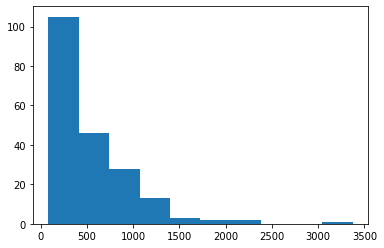

In [45]:
results = []

for i in range(200):
    results.append(run_experiment(update))

plt.hist(results)

(array([58., 55., 29., 22., 13.,  4., 10.,  6.,  0.,  3.]),
 array([  128. ,  1602.7,  3077.4,  4552.1,  6026.8,  7501.5,  8976.2,
        10450.9, 11925.6, 13400.3, 14875. ]),
 <a list of 10 Patch objects>)

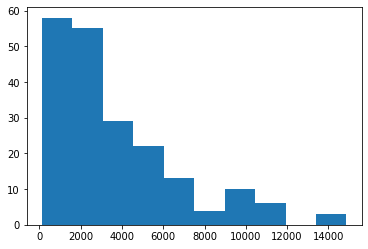

In [46]:
results = []

for i in range(200):
    results.append(run_experiment(update_reversed))

plt.hist(results)

(array([78., 70., 22., 20.,  4.,  4.,  0.,  0.,  0.,  2.]),
 array([ 105. ,  678.5, 1252. , 1825.5, 2399. , 2972.5, 3546. , 4119.5,
        4693. , 5266.5, 5840. ]),
 <a list of 10 Patch objects>)

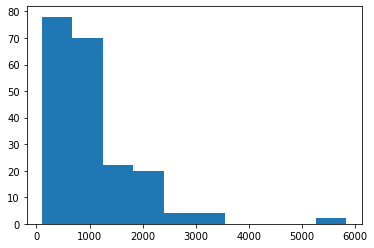

In [47]:
results = []

for i in range(200):
    results.append(run_experiment(update_edge))

plt.hist(results)